## Library import

In [1]:
import re 
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from urlextract import URLExtract
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

##  Convert to dataframe

In [2]:
def data(file):
    pattern=r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s'
    datetime_format='%m/%d/%y, %I:%M %p - '
    
    f=open(file,"r",encoding='utf-8')
    
    raw_string = ' '.join(f.read().split('\n'))
    user_msg = re.split(pattern, raw_string)[1:]
    date_time = re.findall(pattern, raw_string)
    
    df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg})
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_format)
   
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) 
        if(a[1:]): 
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])
       
    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df

In [3]:
df=data("chat.txt")

In [4]:
df=df.replace(['+91 87645113', '+91 87857481', '+91 77750437', '~'],["Amay","Rushu","Abhi","v"])

In [5]:
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month_name()
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [6]:
df.drop(df[df["user"] == "group_notification"].index, inplace=True)

In [7]:
df = df[~df["message"].str.contains("<Media omitted>| <Media omitted>", na=False)]

In [8]:
df["user"].unique()

array(['Amay', 'Rushu', 'Abhi', 'v'], dtype=object)

In [9]:
df.head()

,date_time,user,message,day,month,year,date
1,2023-08-04 12:16:00,Amay,Project sathi topics suggest kara,4,August,2023,2023-08-04
3,2023-08-04 12:16:00,Amay,👆,4,August,2023,2023-08-04
5,2023-08-04 12:29:00,Rushu,Ho class madhe ahe...,4,August,2023,2023-08-04
6,2023-08-04 12:29:00,Rushu,Sagto thoda time..,4,August,2023,2023-08-04
7,2023-08-04 20:07:00,Rushu,Any idea ...,4,August,2023,2023-08-04


In [10]:
word=[]
for message in df["message"]:
    word.extend(message.split())

In [11]:
len(word)

6659

In [12]:
string_list = [str(element) for element in word]

## Links

In [13]:
extract=URLExtract()

In [14]:
links =[]

for message in df['message']:
    links.extend(extract.find_urls(message))

In [15]:
links[0:4]

['https://onlineresults.unipune.ac.in/Result/Dashboard/Default',
 'https://en.wikipedia.org/wiki/Carsharing',
 'https://www.share-now.com/de/en/car-sharing-advantages/',
 'https://forms.gle/hL5T8MugCsghjEM66']

## WordCloud

In [16]:
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

def generate_wc(df):
    text = " ".join(i for i in df)
    wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

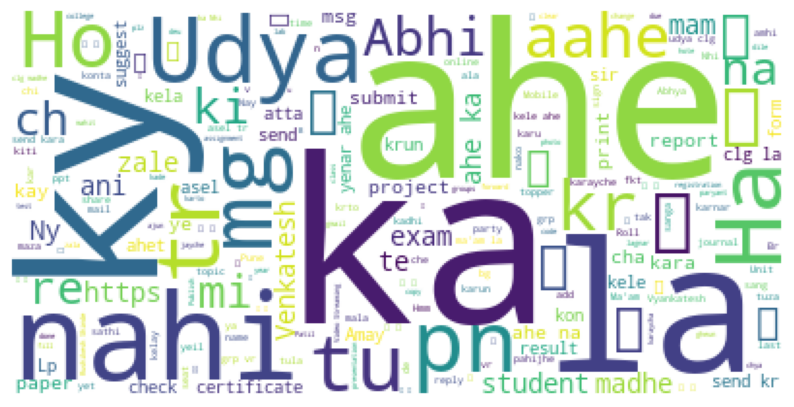

In [17]:
generate_wc(df['message'])

In [18]:
df.head()

,date_time,user,message,day,month,year,date
1,2023-08-04 12:16:00,Amay,Project sathi topics suggest kara,4,August,2023,2023-08-04
3,2023-08-04 12:16:00,Amay,👆,4,August,2023,2023-08-04
5,2023-08-04 12:29:00,Rushu,Ho class madhe ahe...,4,August,2023,2023-08-04
6,2023-08-04 12:29:00,Rushu,Sagto thoda time..,4,August,2023,2023-08-04
7,2023-08-04 20:07:00,Rushu,Any idea ...,4,August,2023,2023-08-04


In [19]:
msg_c = df.groupby("month")["message"].count()

In [20]:
msg_c

month
April        158
August       183
December      61
February      61
January       46
June          77
March         97
May          150
November     312
October       80
September    167
Name: message, dtype: int64

Text(0, 0.5, 'Message Count')

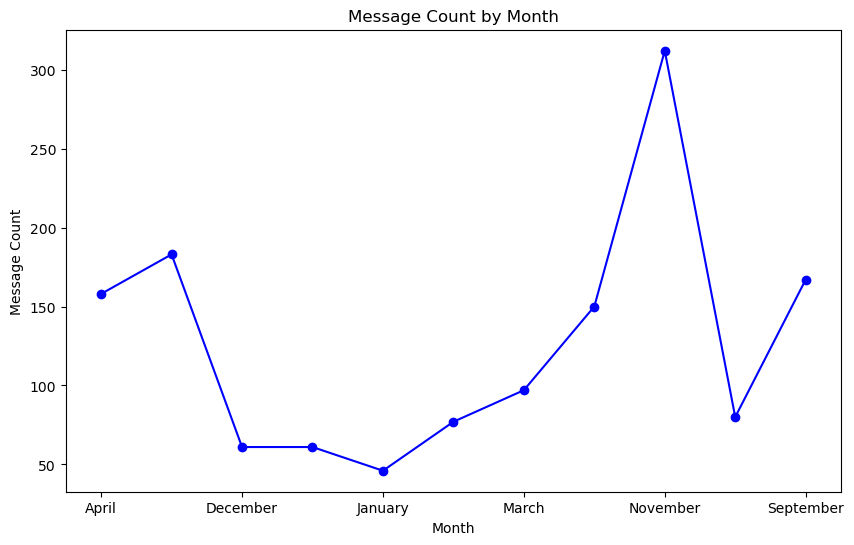

In [21]:
msg_c.plot(marker='o', linestyle='-', color='b', figsize=(10, 6))
plt.title('Message Count by Month')
plt.xlabel('Month')
plt.ylabel('Message Count')

In [22]:
msg_d = df.groupby("date")["message"].count().sort_values(ascending=False).head(10)

In [23]:
msg_d

date
2023-11-20    65
2023-08-05    56
2023-11-21    56
2024-06-14    53
2023-09-08    44
2024-04-15    41
2023-11-17    40
2023-08-04    34
2024-03-06    31
2023-11-04    30
Name: message, dtype: int64

Text(0, 0.5, 'No. of Message')

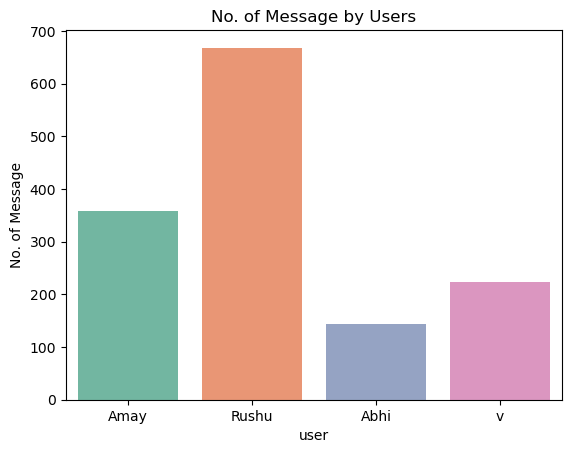

In [24]:
sns.countplot( x="user",data=df , palette = "Set2")
plt.title('No. of Message by Users')
plt.ylabel('No. of Message')


Text(0, 0.5, 'No. of Message')

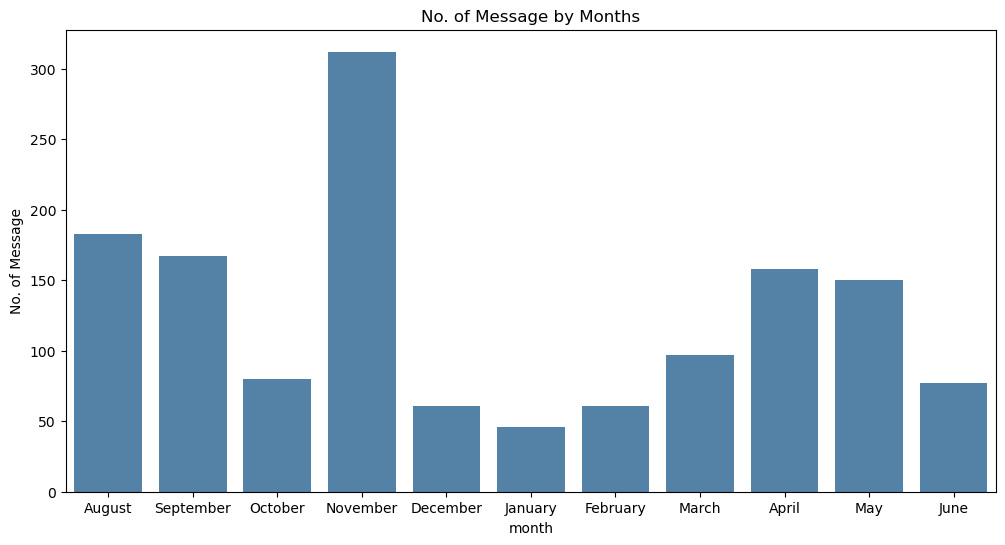

In [25]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x="month",data = df,color='steelblue')
plt.title('No. of Message by Months')
plt.ylabel('No. of Message')
